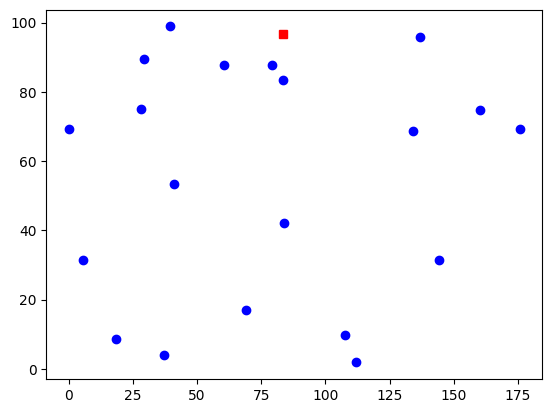

In [23]:
# Capacitated Vehicle Routing Problem with Gurobi
# The Gurobi Optimizer is a mathematical optimization software library for solving mixed-integer linear and quadratic optimization problems.
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproductivity
rnd = np.random
rnd.seed(1)

# Number of clients (excluding depot)
n = 20

# Generate random coordinates for depot and clients
xc = rnd.rand(n+1)*200 # x coordinates
yc = rnd.rand(n+1)*100 # y coordinates

# Plotting the depot and clients
plt.plot(xc[0], yc[0], c='r', marker='s') # Depot
plt.scatter(xc[1:], yc[1:], c='b') # Clients

In [24]:
# Define set of nodes and vehicles
N = [i for i in range(1, n+1)] # Clients
V = [0] + N # Nodes (depot and clients)

# Define set of arcs (edges) between nodes
A = [(i, j) for i in V for j in V if i != j]

# Calculate distance matrix using eulidean distance
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}

# Define vehicle capacity and demand for each client
Q = 20 # Vehicle capacity
q = {i: rnd.randint(1, 10) for i in N} # Demand of each client

In [27]:
from gurobipy import Model, GRB, quicksum

# Create gurobi model
mdl = Model('CVRP')

# Define decision variables
x = mdl.addVars(A, vtype=GRB.BINARY) # Binary decision variable indicating if arc (i, j) is used
u = mdl.addVars(N, vtype=GRB.CONTINUOUS) # Continuous decision variable representing the cumulative load at each node

In [29]:
# Set objective function: minimize total distance
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j] * c[i, j] for i, j in A))

# Add constraints
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N) # Each client is visited exactly once
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N) # Each client is departed from exactly once
mdl.addConstrs((x[i, j] == 1) >> (u[i] + q[j] == u[j]) for i, j in A if i != 0 and j != 0)  # Flow constraint
mdl.addConstrs(u[i] >= q[i] for i in N) # Demand constraint: sufficient capacity at each node
mdl.addConstrs(u[i] <= Q for i in N) # Vehicle capacity constraint

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>}

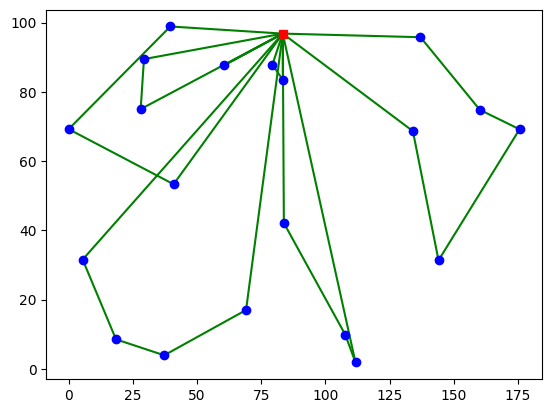

In [32]:
# Set parameters and solve the model
mdl.Params.MIPGap = 0.1    # Allowable gap for MIP (Mixed Integer Programming) solutions
mdl.Params.TimeLimit = 30  # Time limit for optimization process (in seconds)
mdl.optimize()

# Extract active arcs (edges) from the optimized solution
active_arcs = [a for a in A if x[a].x > 0.99]

# Plot the optimized route
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)  # Green lines for optimized routes

# Plotting the depot and clients
plt.plot(xc[0], yc[0], c='r', marker='s')  # Depot
plt.scatter(xc[1:], yc[1:], c='b')         # Clients
